In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV, RFE
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict


In [134]:
data = pd.read_csv('hcp_drug_prediction_data_cleaned.csv')
# data['Age_recoded'] = data['Age_recoded'].astype('category')
# data['Gender_recoded'] = data['Gender_recoded'].astype('category')
# print(data.dtypes)

In [135]:
data.head()

,Subject,PSQI_Score,PicSeq_AgeAdj,CardSort_AgeAdj,Flanker_AgeAdj,PMAT24_A_CR,PMAT24_A_SI,PMAT24_A_RTCR,ReadEng_AgeAdj,PicVocab_AgeAdj,...,PercStress_Unadj,SelfEff_Unadj,NEOFAC_A,NEOFAC_O,NEOFAC_C,NEOFAC_N,NEOFAC_E,sub_use,Age_recoded,Gender_recoded
0,100004,8,112.44,88.64,111.01,19.0,0.0,15590.0,96.91405,104.9375,...,55.4,39.6,27.0,15.0,28.0,24.0,25.0,0,1,0
1,100206,6,118.78,104.94,116.55,20.0,0.0,18574.5,103.44410,117.0361,...,57.8,44.0,29.0,23.0,26.0,21.0,32.0,0,2,0
2,100307,4,103.45,109.92,101.90,17.0,2.0,11839.0,98.73000,96.8100,...,57.9,37.5,37.0,24.0,35.0,15.0,37.0,0,2,1
3,100408,4,125.19,100.77,113.51,7.0,12.0,3042.0,125.64000,132.6300,...,46.8,56.4,33.0,29.0,34.0,15.0,33.0,1,3,0
4,100610,4,101.69,115.18,114.18,23.0,0.0,12280.0,132.41240,146.5971,...,37.8,53.2,31.0,33.0,36.0,7.0,15.0,0,2,0


In [136]:
X = data.drop(['Subject', 'sub_use', 'Gender_recoded'], axis = 1)
y = data['sub_use']

In [137]:
# from sklearn.preprocessing import StandardScaler, OneHotEncoder

# dataset = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")
# print(dataset.head(5))

# # Define which columns should be encoded vs scaled
# columns_to_encode = ['rank']
# columns_to_scale  = ['gre', 'gpa']

# # Instantiate encoder/scaler
# scaler = StandardScaler()
# ohe    = OneHotEncoder(sparse=False)

# # Scale and Encode Separate Columns
# scaled_columns  = scaler.fit_transform(dataset[columns_to_scale]) 
# encoded_columns =    ohe.fit_transform(dataset[columns_to_encode])

# # Concatenate (Column-Bind) Processed Columns Back Together
# processed_data = np.concatenate([scaled_columns, encoded_columns], axis=1)

In [138]:
cols_to_encode = 'Age_recoded'
# cols_to_scale = X.columns[X.columns != cols_to_encode]
cols_to_scale = list(set(X.columns) - set(cols_to_encode)) # this method does NOT maintain the ordering of the columns
print(cols_to_encode)
print(X.columns)
print(cols_to_scale)

Age_recoded
Index(['PSQI_Score', 'PicSeq_AgeAdj', 'CardSort_AgeAdj', 'Flanker_AgeAdj',
       'PMAT24_A_CR', 'PMAT24_A_SI', 'PMAT24_A_RTCR', 'ReadEng_AgeAdj',
       'PicVocab_AgeAdj', 'ProcSpeed_AgeAdj', 'DDisc_SV_1mo_200',
       'DDisc_SV_6mo_200', 'DDisc_SV_1yr_200', 'DDisc_SV_3yr_200',
       'DDisc_SV_5yr_200', 'DDisc_SV_10yr_200', 'DDisc_SV_1mo_40K',
       'DDisc_SV_6mo_40K', 'DDisc_SV_1yr_40K', 'DDisc_SV_3yr_40K',
       'DDisc_SV_5yr_40K', 'DDisc_SV_10yr_40K', 'DDisc_AUC_200',
       'DDisc_AUC_40K', 'VSPLOT_TC', 'VSPLOT_CRTE', 'VSPLOT_OFF', 'SCPT_TP',
       'SCPT_TN', 'SCPT_FP', 'SCPT_FN', 'SCPT_TPRT', 'SCPT_SEN', 'SCPT_SPEC',
       'SCPT_LRNR', 'IWRD_TOT', 'IWRD_RTC', 'ListSort_AgeAdj',
       'CogFluidComp_AgeAdj', 'CogEarlyComp_AgeAdj', 'CogTotalComp_AgeAdj',
       'CogCrystalComp_AgeAdj', 'ER40_CR', 'ER40_CRT', 'ER40ANG', 'ER40FEAR',
       'ER40HAP', 'ER40NOE', 'ER40SAD', 'AngAffect_Unadj', 'AngHostil_Unadj',
       'AngAggr_Unadj', 'FearAffect_Unadj', 'FearSomat_Una

In [139]:
X.loc[1:10,cols_to_scale]

,ER40FEAR,Flanker_AgeAdj,SCPT_FP,NEOFAC_N,PMAT24_A_SI,ListSort_AgeAdj,ER40_CR,AngHostil_Unadj,EmotSupp_Unadj,SCPT_TPRT,...,DDisc_SV_1yr_200,FearAffect_Unadj,ER40_CRT,PercReject_Unadj,PicSeq_AgeAdj,DDisc_SV_6mo_40K,Loneliness_Unadj,DDisc_SV_10yr_200,Sadness_Unadj,IWRD_RTC
1,7.0,116.55,5.0,21.0,0.0,103.57,38.0,61.7,43.9,520.0,...,9.38,63.3,1545.0,64.8,118.78,625.0,63.8,9.38,55.0,1475.00
2,8.0,101.90,5.0,15.0,2.0,98.44,39.0,60.8,45.0,412.0,...,103.13,53.9,1471.0,54.1,103.45,29375.0,53.7,9.38,53.4,1442.00
3,8.0,113.51,10.0,15.0,12.0,102.63,36.0,42.8,50.1,468.0,...,46.88,55.1,1537.0,50.1,125.19,29375.0,51.9,9.38,49.9,1450.75
4,8.0,114.18,3.0,7.0,0.0,108.26,39.0,49.1,56.8,465.0,...,184.38,49.6,1590.0,54.1,101.69,39375.0,53.5,146.88,44.2,1240.00
5,6.0,92.33,3.0,13.0,8.0,84.01,30.0,49.0,62.5,440.0,...,115.63,49.3,2169.5,46.5,70.00,36875.0,50.3,40.63,48.7,1579.50
6,7.0,96.19,7.0,12.0,5.0,123.73,35.0,52.3,62.5,510.0,...,9.38,48.4,1880.0,43.7,97.37,39375.0,52.0,3.13,48.1,1390.00
7,8.0,84.46,5.0,15.0,11.0,102.63,38.0,43.3,33.2,435.0,...,190.63,65.4,2070.0,55.3,95.64,39375.0,54.7,96.88,51.7,1770.00
8,5.0,103.37,13.0,2.0,4.0,108.26,35.0,36.6,43.7,471.0,...,196.88,43.3,2002.0,35.9,93.36,34375.0,46.4,196.88,38.5,1248.00
9,8.0,100.58,19.0,12.0,0.0,107.32,35.0,55.9,62.5,410.0,...,3.13,51.2,1950.0,35.9,111.31,31875.0,53.7,3.13,42.7,1470.00
10,8.0,108.32,7.0,21.0,0.0,102.63,34.0,52.9,56.8,400.0,...,71.88,51.2,1760.0,50.6,101.54,39375.0,44.9,9.38,45.6,1700.00


In [58]:
scaler = StandardScaler()
# ohe = OneHotEncoder(sparse = False)

In [59]:
scaled_cols = scaler.fit_transform(X[cols_to_scale]) # scale the continuous variables
print(scaled_cols.mean(axis = 1))
print(scaled_cols.shape)
print(scaled_cols)
# encoded_cols = ohe.fit_transform(X[cols_to_encode]) # dummy code the categorical variables

[-0.36149022 -0.00321271 -0.12149893 ... -0.11657399 -0.10699566
  0.06472408]
(1169, 72)
[[-0.73197661  0.95295324 -1.03825435 ... -0.22156172  0.90487396
  -0.89987073]
 [ 0.09158514  1.50160919 -0.11911816 ... -0.53819454  1.06716265
  -0.28498604]
 [ 0.91514689  0.05074101 -0.11911816 ... -0.53819454  0.86742273
  -0.39466818]
 ...
 [-3.20266187  1.35899826 -0.8084703  ... -0.69651095 -0.39343553
   0.83676306]
 [-0.73197661 -1.33773488  3.09785849 ...  1.67823522 -0.36846804
  -0.62400355]
 [ 0.91514689 -1.03864806  0.57023398 ...  0.57002034 -0.1063094
   0.68719652]]


In [60]:
# print(encoded_cols.shape)

In [61]:
print(y.shape)
print(type(scaled_cols))
print(type(data['Age_recoded']))
# print(type(encoded_cols))
# X_scaled_encoded = np.concatenate((scaled_cols, encoded_cols), axis = 1)
X_scaled = pd.concat([pd.DataFrame(scaled_cols, columns = pd.Series(cols_to_scale)), data['Age_recoded']], axis = 1)
print(X_scaled)
X_scaled_array = np.array(X_scaled)

(1169,)
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
      ER40FEAR  Flanker_AgeAdj   SCPT_FP  NEOFAC_N  PMAT24_A_SI  \
0    -0.731977        0.952953 -1.038254  0.982099    -0.803643   
1     0.091585        1.501609 -0.119118  0.574402    -0.803643   
2     0.915147        0.050741 -0.119118 -0.240991    -0.307100   
3     0.915147        1.200542  1.029802 -0.240991     2.175613   
4     0.915147        1.266895 -0.578686 -1.328182    -0.803643   
...        ...             ...       ...       ...          ...   
1164  0.915147        1.427333  1.719154 -0.105092     0.437714   
1165  0.091585        0.502342 -1.038254 -0.920485    -0.803643   
1166 -3.202662        1.358998 -0.808470  0.710301    -0.803643   
1167 -0.731977       -1.337735  3.097858  0.166706    -0.803643   
1168  0.915147       -1.038648  0.570234  0.438504    -0.803643   

      ListSort_AgeAdj   ER40_CR  AngHostil_Unadj  EmotSupp_Unadj  SCPT_TPRT  \
0           -1.344401  0.185220         1.325825

In [62]:
# print(__doc__)

# import matplotlib.pyplot as plt
# from sklearn.svm import SVC
# from sklearn.model_selection import StratifiedKFold
# from sklearn.feature_selection import RFECV
# from sklearn.datasets import make_classification

# # Build a classification task using 3 informative features
# X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
#                            n_redundant=2, n_repeated=0, n_classes=8,
#                            n_clusters_per_class=1, random_state=0)

# # Create the RFE object and compute a cross-validated score.
# svc = SVC(kernel="linear")
# # The "accuracy" scoring is proportional to the number of correct
# # classifications
# rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
#               scoring='accuracy')
# rfecv.fit(X, y)

# print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

In [63]:
log_reg = LogisticRegression(penalty = 'l1', solver = 'liblinear', class_weight='balanced')
# rfecv = RFECV(log_reg, step = 1, cv = StratifiedKFold(5), scoring = 'accuracy')
rfecv = RFECV(log_reg, step = 1, cv = StratifiedKFold(5), scoring = 'accuracy')
rfecv.fit(X_scaled_array,y)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='warn', n_jobs=None,
                                   penalty='l1', random_state=None,
                                   solver='liblinear', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [132]:
rfecv.decision_function(X_scaled_array).shape

(1169,)

Optimal number of features : 13


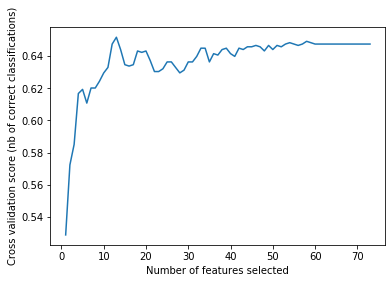

In [64]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [65]:
rfecv.grid_scores_[0]

0.5286568061145724

In [66]:
print(rfecv.support_.sum())
print(rfecv.support_)
X_columns = X_scaled.columns
print(X_columns)

13
[False False False False False False False False False False False  True
 False  True False False False False False False  True  True False False
  True False False  True  True False False False  True False  True False
 False False False False False False False False False  True  True False
 False False False False False  True False False False False False False
 False False  True False False False False False False False False False
 False]
Index(['ER40FEAR', 'Flanker_AgeAdj', 'SCPT_FP', 'NEOFAC_N', 'PMAT24_A_SI',
       'ListSort_AgeAdj', 'ER40_CR', 'AngHostil_Unadj', 'EmotSupp_Unadj',
       'SCPT_TPRT', 'PMAT24_A_CR', 'SelfEff_Unadj', 'DDisc_SV_3yr_200',
       'PosAffect_Unadj', 'PercStress_Unadj', 'SCPT_TN', 'DDisc_SV_5yr_40K',
       'DDisc_SV_1mo_40K', 'LifeSatisf_Unadj', 'ER40SAD', 'VSPLOT_OFF',
       'AngAffect_Unadj', 'DDisc_AUC_200', 'ReadEng_AgeAdj',
       'CogEarlyComp_AgeAdj', 'DDisc_SV_1mo_200', 'CogTotalComp_AgeAdj',
       'DDisc_SV_10yr_40K', 'DDisc_SV_1yr_40K',

In [67]:
X_columns[rfecv.support_]

Index(['SelfEff_Unadj', 'PosAffect_Unadj', 'VSPLOT_OFF', 'AngAffect_Unadj',
       'CogEarlyComp_AgeAdj', 'DDisc_SV_10yr_40K', 'DDisc_SV_1yr_40K',
       'CardSort_AgeAdj', 'NEOFAC_C', 'AngAggr_Unadj', 'FearSomat_Unadj',
       'NEOFAC_O', 'DDisc_SV_1yr_200'],
      dtype='object')

In [68]:
svc = SVC(kernel = 'linear', class_weight='balanced')
# rfecv = RFECV(log_reg, step = 1, cv = StratifiedKFold(5), scoring = 'accuracy')
rfecv_svc = RFECV(svc, step = 1, cv = StratifiedKFold(5), scoring = 'accuracy')
rfecv_svc.fit(X_scaled_array,y)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
                    decision_function_shape='ovr', degree=3,
                    gamma='auto_deprecated', kernel='linear', max_iter=-1,
                    probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

Optimal number of features : 47


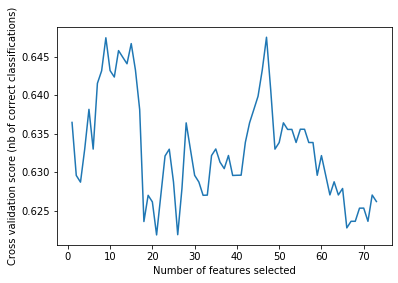

In [69]:
print("Optimal number of features : %d" % rfecv_svc.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv_svc.grid_scores_) + 1), rfecv_svc.grid_scores_)
plt.show()

In [110]:
print(rfecv_svc.grid_scores_[2])
X_columns[rfecv_svc.support_]

0.6286979684952472


Index(['Flanker_AgeAdj', 'SCPT_FP', 'PMAT24_A_SI', 'ListSort_AgeAdj',
       'EmotSupp_Unadj', 'SCPT_TPRT', 'PMAT24_A_CR', 'SelfEff_Unadj',
       'PosAffect_Unadj', 'PercStress_Unadj', 'SCPT_TN', 'DDisc_SV_1mo_40K',
       'ER40SAD', 'VSPLOT_OFF', 'AngAffect_Unadj', 'ReadEng_AgeAdj',
       'CogEarlyComp_AgeAdj', 'DDisc_SV_1mo_200', 'DDisc_SV_10yr_40K',
       'DDisc_SV_1yr_40K', 'DDisc_SV_6mo_200', 'PSQI_Score', 'CardSort_AgeAdj',
       'Age_recoded', 'NEOFAC_C', 'DDisc_SV_3yr_40K', 'CogFluidComp_AgeAdj',
       'VSPLOT_TC', 'CogCrystalComp_AgeAdj', 'ER40HAP', 'AngAggr_Unadj',
       'FearSomat_Unadj', 'MeanPurp_Unadj', 'Friendship_Unadj', 'NEOFAC_E',
       'VSPLOT_CRTE', 'NEOFAC_O', 'ER40ANG', 'PicVocab_AgeAdj',
       'ProcSpeed_AgeAdj', 'SCPT_SEN', 'DDisc_SV_1yr_200', 'ER40_CRT',
       'PercReject_Unadj', 'PicSeq_AgeAdj', 'Loneliness_Unadj', 'IWRD_RTC'],
      dtype='object')

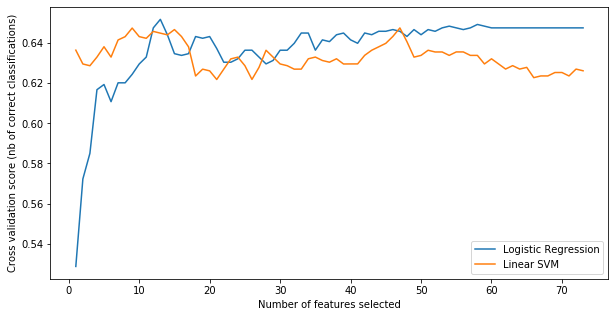

In [118]:
# Plot number of features VS. cross-validation scores for the svm and logistic regression models
plt.figure()

plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1,len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, label = 'Logistic Regression')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv_svc.grid_scores_, label = 'Linear SVM')
plt.legend()
plt.show()
# plt.savefig('rfecv_logreg_svm.png', dpi=300, bbox_inches='tight')

In [72]:
X_scaled_columns = np.array(X_scaled.columns)
remaining_features = []
for i in range(1,len(X.columns)):
    if i%5 == 0:
        print(i)
    model=RFE(log_reg, n_features_to_select = i)
    model.fit(X_scaled,y)
    supports_idx = model.get_support()
    supports = X_scaled_columns[supports_idx]
    remaining_features.append(supports)
    if i < len(X.columns):
        model = None


5
10
15
20
25
30
35
40
45
50
55
60
65
70


In [73]:
# print(len(remaining_features))
for i in range(10):
    print(remaining_features[i])

['VSPLOT_OFF']
['VSPLOT_OFF' 'AngAggr_Unadj']
['VSPLOT_OFF' 'AngAffect_Unadj' 'AngAggr_Unadj']
['VSPLOT_OFF' 'AngAffect_Unadj' 'DDisc_SV_10yr_40K' 'AngAggr_Unadj']
['VSPLOT_OFF' 'AngAffect_Unadj' 'DDisc_SV_10yr_40K' 'DDisc_SV_1yr_40K'
 'AngAggr_Unadj']
['SelfEff_Unadj' 'VSPLOT_OFF' 'AngAffect_Unadj' 'DDisc_SV_10yr_40K'
 'DDisc_SV_1yr_40K' 'AngAggr_Unadj']
['SelfEff_Unadj' 'VSPLOT_OFF' 'AngAffect_Unadj' 'DDisc_SV_10yr_40K'
 'DDisc_SV_1yr_40K' 'NEOFAC_C' 'AngAggr_Unadj']
['SelfEff_Unadj' 'VSPLOT_OFF' 'AngAffect_Unadj' 'DDisc_SV_10yr_40K'
 'DDisc_SV_1yr_40K' 'NEOFAC_C' 'AngAggr_Unadj' 'FearSomat_Unadj']
['SelfEff_Unadj' 'VSPLOT_OFF' 'AngAffect_Unadj' 'DDisc_SV_10yr_40K'
 'DDisc_SV_1yr_40K' 'NEOFAC_C' 'AngAggr_Unadj' 'FearSomat_Unadj'
 'DDisc_SV_1yr_200']
['SelfEff_Unadj' 'PosAffect_Unadj' 'VSPLOT_OFF' 'AngAffect_Unadj'
 'DDisc_SV_10yr_40K' 'DDisc_SV_1yr_40K' 'NEOFAC_C' 'AngAggr_Unadj'
 'FearSomat_Unadj' 'DDisc_SV_1yr_200']


In [74]:
X_scaled_columns = np.array(X_scaled.columns)
svc_remaining_features = []
for i in range(1,len(X.columns)):
    if i%5 == 0:
        print(i)
    model=RFE(svc, n_features_to_select = i)
    model.fit(X_scaled,y)
    supports_idx = model.get_support()
    supports = X_scaled_columns[supports_idx]
    svc_remaining_features.append(supports)
    if i < len(X.columns):
        model = None


5
10
15
20
25
30
35
40
45
50
55
60
65
70


In [75]:
# print(len(remaining_features))
for i in range(10):
    print(svc_remaining_features[i])

['AngAggr_Unadj']
['VSPLOT_OFF' 'AngAggr_Unadj']
['VSPLOT_OFF' 'AngAggr_Unadj' 'FearSomat_Unadj']
['SelfEff_Unadj' 'VSPLOT_OFF' 'AngAggr_Unadj' 'FearSomat_Unadj']
['SelfEff_Unadj' 'VSPLOT_OFF' 'NEOFAC_C' 'AngAggr_Unadj' 'FearSomat_Unadj']
['SelfEff_Unadj' 'VSPLOT_OFF' 'NEOFAC_C' 'AngAggr_Unadj' 'FearSomat_Unadj'
 'DDisc_SV_1yr_200']
['SelfEff_Unadj' 'VSPLOT_OFF' 'DDisc_SV_1yr_40K' 'NEOFAC_C'
 'AngAggr_Unadj' 'FearSomat_Unadj' 'DDisc_SV_1yr_200']
['SelfEff_Unadj' 'VSPLOT_OFF' 'AngAffect_Unadj' 'DDisc_SV_1yr_40K'
 'NEOFAC_C' 'AngAggr_Unadj' 'FearSomat_Unadj' 'DDisc_SV_1yr_200']
['SelfEff_Unadj' 'VSPLOT_OFF' 'AngAffect_Unadj' 'DDisc_SV_10yr_40K'
 'DDisc_SV_1yr_40K' 'NEOFAC_C' 'AngAggr_Unadj' 'FearSomat_Unadj'
 'DDisc_SV_1yr_200']
['SelfEff_Unadj' 'VSPLOT_OFF' 'AngAffect_Unadj' 'CogEarlyComp_AgeAdj'
 'DDisc_SV_10yr_40K' 'DDisc_SV_1yr_40K' 'NEOFAC_C' 'AngAggr_Unadj'
 'FearSomat_Unadj' 'DDisc_SV_1yr_200']


In [76]:
print(rfecv_svc.support_.sum())
print('RFECV Optimal SVM features')
print(X_scaled.columns[rfecv_svc.support_])
# 10 top measures from 'RFECV_And_10features_determination.ipynb' svc:
# 'CardSort_AgeAdj', 'DDisc_SV_1yr_200', 'DDisc_SV_1yr_40K', 'VSPLOT_OFF','CogEarlyComp_AgeAdj', 
# 'AngAggr_Unadj', 'FearSomat_Unadj','SelfEff_Unadj', 'NEOFAC_C', 'Gender_recoded'

print(rfecv.support_.sum())
print('RFECV Optimval Logistic Regression')
print(X_scaled.columns[rfecv.support_])

47
RFECV Optimal SVM features
Index(['Flanker_AgeAdj', 'SCPT_FP', 'PMAT24_A_SI', 'ListSort_AgeAdj',
       'EmotSupp_Unadj', 'SCPT_TPRT', 'PMAT24_A_CR', 'SelfEff_Unadj',
       'PosAffect_Unadj', 'PercStress_Unadj', 'SCPT_TN', 'DDisc_SV_1mo_40K',
       'ER40SAD', 'VSPLOT_OFF', 'AngAffect_Unadj', 'ReadEng_AgeAdj',
       'CogEarlyComp_AgeAdj', 'DDisc_SV_1mo_200', 'DDisc_SV_10yr_40K',
       'DDisc_SV_1yr_40K', 'DDisc_SV_6mo_200', 'PSQI_Score', 'CardSort_AgeAdj',
       'Age_recoded', 'NEOFAC_C', 'DDisc_SV_3yr_40K', 'CogFluidComp_AgeAdj',
       'VSPLOT_TC', 'CogCrystalComp_AgeAdj', 'ER40HAP', 'AngAggr_Unadj',
       'FearSomat_Unadj', 'MeanPurp_Unadj', 'Friendship_Unadj', 'NEOFAC_E',
       'VSPLOT_CRTE', 'NEOFAC_O', 'ER40ANG', 'PicVocab_AgeAdj',
       'ProcSpeed_AgeAdj', 'SCPT_SEN', 'DDisc_SV_1yr_200', 'ER40_CRT',
       'PercReject_Unadj', 'PicSeq_AgeAdj', 'Loneliness_Unadj', 'IWRD_RTC'],
      dtype='object')
13
RFECV Optimval Logistic Regression
Index(['SelfEff_Unadj', 'PosAffect_

In [83]:
X_logreg_top = np.array(X['VSPLOT_OFF']).reshape(-1, 1)

log_reg_mod = LogisticRegressionCV(penalty = 'l1', solver = 'liblinear', class_weight='balanced', cv = 5)
log_reg_mod.fit(X_logreg_top, y)
print(log_reg_mod.score(X_logreg_top, y))
pred_labels = log_reg_mod.predict(X_logreg_top)
print(sum(pred_labels == 1))

0.7553464499572284
0


0

In [95]:
# ['SelfEff_Unadj' 'VSPLOT_OFF' 'AngAffect_Unadj' 'CogEarlyComp_AgeAdj'
#  'DDisc_SV_10yr_40K' 'DDisc_SV_1yr_40K' 'NEOFAC_C' 'AngAggr_Unadj'
#  'FearSomat_Unadj' 'DDisc_SV_1yr_200']
X_svm_top = np.array(pd.concat([X['SelfEff_Unadj'], X['VSPLOT_OFF'], X['AngAffect_Unadj'], X['CogEarlyComp_AgeAdj'], \
                               X['DDisc_SV_10yr_40K'], X['DDisc_SV_1yr_40K'], X['NEOFAC_C'], X['AngAggr_Unadj'],...
                               X['FearSomat_Unadj'], X['DDisc_SV_1yr_200']], axis = 1))#.reshape(-1, 1)
model_svc = SVC(kernel = 'linear', class_weight='balanced')
model_svc_scores = cross_validate(model_svc, X_svm_top, y, cv = StratifiedKFold(5))
print(model_svc_scores['test_score'].mean())
cross_val_predict(model_svc, X_svm_top, y, cv = 5)

In [97]:
model_svc = SVC(kernel = 'linear', class_weight='balanced')
model_svc_scores = cross_validate(model_svc, X_svm_top, y, cv = StratifiedKFold(5))

In [98]:
print(model_svc_scores['test_score'].mean())

0.5945787880277882


In [99]:
cross_val_predict(model_svc, X_svm_top, y, cv = 5)

array([0, 0, 0, ..., 1, 0, 0])

In [109]:
# ['SelfEff_Unadj' 'VSPLOT_OFF' 'AngAffect_Unadj' 'CogEarlyComp_AgeAdj'
#  'DDisc_SV_10yr_40K' 'DDisc_SV_1yr_40K' 'NEOFAC_C' 'AngAggr_Unadj'
#  'FearSomat_Unadj' 'DDisc_SV_1yr_200']
# X_svm_top = np.array(X['AngAggr_Unadj']).reshape(-1, 1)
X_svm_top = pd.concat([X['AngAggr_Unadj'], X['VSPLOT_OFF'], X['FearSomat_Unadj']], axis = 1)
model_svc = SVC(kernel = 'linear', class_weight='balanced')
model_svc_scores = cross_validate(model_svc, X_svm_top, y, cv = StratifiedKFold(5))
print(model_svc_scores['test_score'].mean())
cross_val_predict(model_svc, X_svm_top, y, cv = 5)

0.6338261424043544


array([0, 0, 0, ..., 1, 1, 0])